In [57]:
import rasterio
import matplotlib.pyplot as plt

# Specify the file path to your .tif file
file_path = '/home/cs-yang3/rds/rds-t2-cs177-KNoCjrg2atA/wp3/data/satellite_imagery/esa_10/RW2019L8/RW201900000002.tif'

# Open the .tif file using rasterio
with rasterio.open(file_path) as dataset:
    
    bands = dataset.read([4,3,2])

    

In [58]:
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()
band1 = bands[1]
band1_flat = band1.flatten()

# Remove 'no data' values if they exist (e.g., if nodata is represented by -9999 or similar)
band1_clean = band1_flat[band1_flat != dataset.nodata] if dataset.nodata else band1_flat

# Convert the cleaned pixel data into a pandas DataFrame
df = pd.DataFrame({'pixel_value': band1_clean})

# Create a histogram using Altair
histogram = alt.Chart(df).mark_bar().encode(
    alt.X('pixel_value:Q', bin=alt.Bin(maxbins=50), title='Pixel Value'),  # Binning pixel values
    alt.Y('count()', title='Frequency')  # Counting occurrences for each bin
).properties(
    title='Histogram of Pixel Values',
    width=600,
    height=400
)

# Display the histogram
histogram

alt.Chart(...)

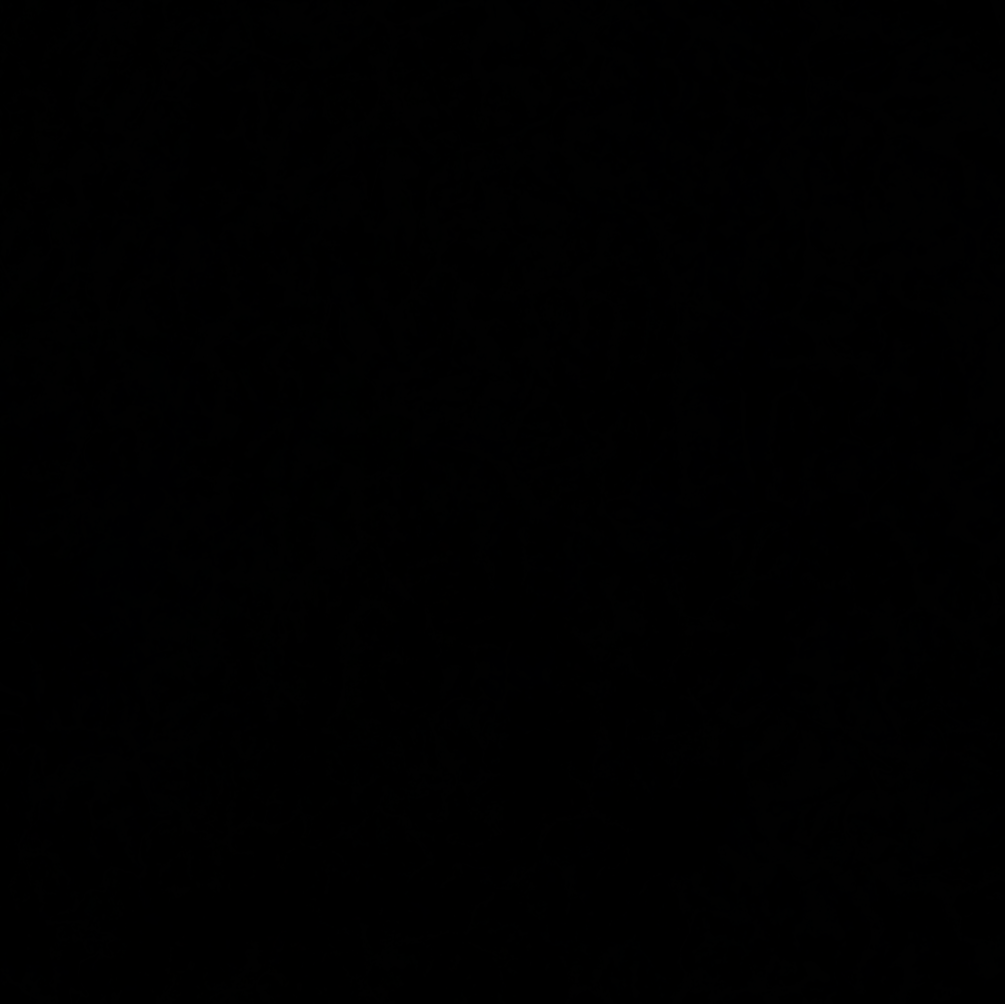

In [64]:
import numpy as np
from PIL import Image
file_path = '/home/cs-yang3/rds/rds-t2-cs177-KNoCjrg2atA/wp3/data/satellite_imagery/esa_10/RW2019S2/RW201900000016.tif'
# Open the .tif file using rasterio
with rasterio.open(file_path) as dataset:
    # Read bands 4 (red), 3 (green), and 2 (blue)
    red = dataset.read(4)
    green = dataset.read(3)
    blue = dataset.read(2)

# Function to normalize the pixel values to the range 0-255
def normalize(array):
    array_min, array_max = 7000, 20000
    normalized = ((array - array_min) / (array_max - array_min) * 255).astype(np.float32)
    # return (array/1000).astype(np.uint8)
    # Clip values to the specified range (0-255 by default)
    return np.clip(normalized, 0, 255).astype(np.uint8)

# Normalize the bands
red_norm = normalize(red)
green_norm = normalize(green)
blue_norm = normalize(blue)

# Stack the bands to create an RGB image (Bands: Red, Green, Blue)
rgb_image = np.stack([red_norm, green_norm, blue_norm], axis=-1)

# Create an image using PIL
image = Image.fromarray(rgb_image)

# Display the image
image